# Drug Classification

## Getting dataset

In [1]:
import pandas as pd
import numpy as np

In [2]:
df = pd.read_csv("data/proj47/drug200.csv")
df.head()

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
0,23,F,HIGH,HIGH,25.355,DrugY
1,47,M,LOW,HIGH,13.093,drugC
2,47,M,LOW,HIGH,10.114,drugC
3,28,F,NORMAL,HIGH,7.798,drugX
4,61,F,LOW,HIGH,18.043,DrugY


## Data Preparation

In [3]:
df.isna().sum()

Age            0
Sex            0
BP             0
Cholesterol    0
Na_to_K        0
Drug           0
dtype: int64

## Data Exploration 

In [4]:
import matplotlib.pyplot as plt
import seaborn as sns

<AxesSubplot:ylabel='Count'>

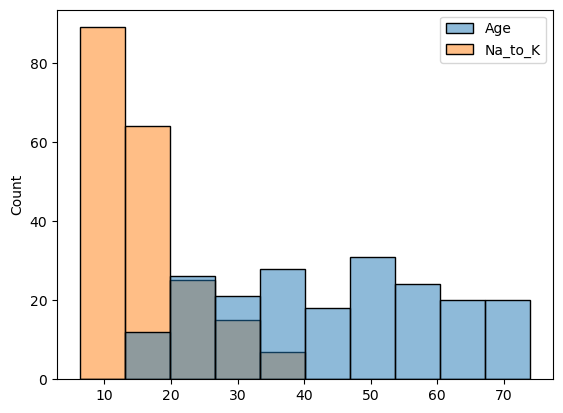

In [5]:
sns.histplot(data=df)

In [15]:
df["BP"].value_counts().keys()

Index(['HIGH', 'LOW', 'NORMAL'], dtype='object')

<BarContainer object of 3 artists>

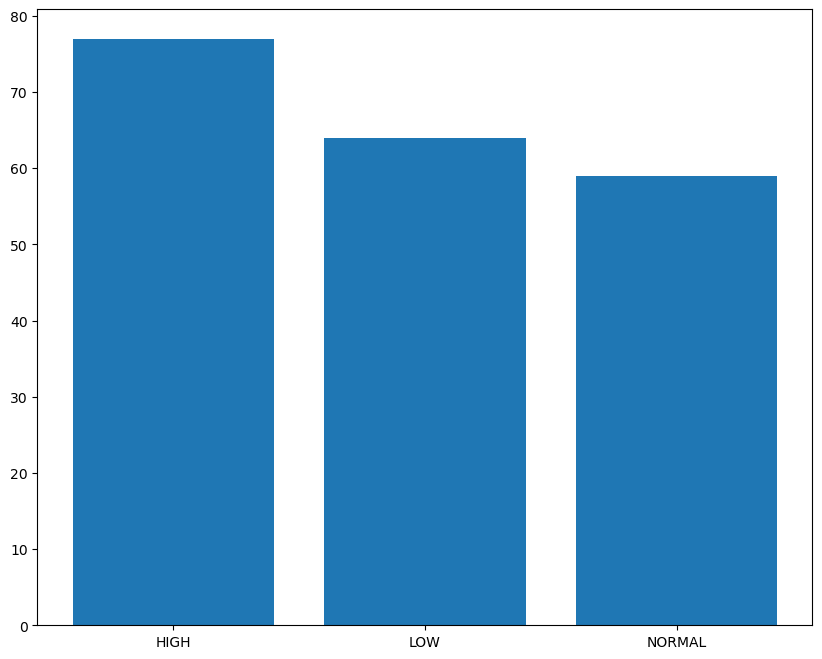

In [16]:
fig, ax = plt.subplots(figsize=(10, 8))
ax.bar(x=df["BP"].value_counts().keys(), height=df["BP"].value_counts().values)

## Data Modeling

In [17]:
df.head()

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
0,23,F,HIGH,HIGH,25.355,DrugY
1,47,M,LOW,HIGH,13.093,drugC
2,47,M,LOW,HIGH,10.114,drugC
3,28,F,NORMAL,HIGH,7.798,drugX
4,61,F,LOW,HIGH,18.043,DrugY


In [22]:
from sklearn.preprocessing import LabelEncoder
for stuff in df.keys():
    if pd.api.types.is_object_dtype(df[stuff]) == True:
        le = LabelEncoder()
        df[stuff] = le.fit_transform(df[stuff])
        print("-" * 10)
        print(stuff)
        print(le.classes_)
        print("-" * 10)

----------
Sex
['F' 'M']
----------
----------
BP
['HIGH' 'LOW' 'NORMAL']
----------
----------
Cholesterol
['HIGH' 'NORMAL']
----------
----------
Drug
['DrugY' 'drugA' 'drugB' 'drugC' 'drugX']
----------


In [23]:
df.head()

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
0,23,0,0,0,25.355,0
1,47,1,1,0,13.093,3
2,47,1,1,0,10.114,3
3,28,0,2,0,7.798,4
4,61,0,1,0,18.043,0


In [24]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.neighbors import KNeighborsClassifier 
from sklearn.svm import SVC

In [25]:
X = df.drop("Drug", axis=1)
y = df["Drug"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [26]:
# Neighbours

knc = KNeighborsClassifier()
knc.fit(X_train, y_train)
knc.score(X_test, y_test)

0.75

In [27]:
# SVC

svclf = SVC().fit(X_train, y_train)
svclf.score(X_test, y_test)

0.775

In [28]:
# Random Forest

rclf = RandomForestClassifier()
rclf.fit(X_train, y_train)
rclf.score(X_test, y_test) # Got 100% Accuracy

1.0

In [35]:
# XGB 

xgbclg = XGBClassifier()
xgbclg.fit(X_train.values, y_train.values)
xgbclg.score(X_test.values, y_test.values)

1.0

## Prediction

In [30]:
rclf.predict([[23, 1, 1, 1, 43.2]])

/home/djoe/.local/lib/python3.10/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


array([0])

In [36]:
xgbclg.predict([[23, 1, 1, 1, 43.2]])

array([0])